In [100]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [101]:
df = pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])

In [102]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [103]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [104]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [105]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [106]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-108-45ae5e670a90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
<ipython-input-108-45ae5e670a90>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

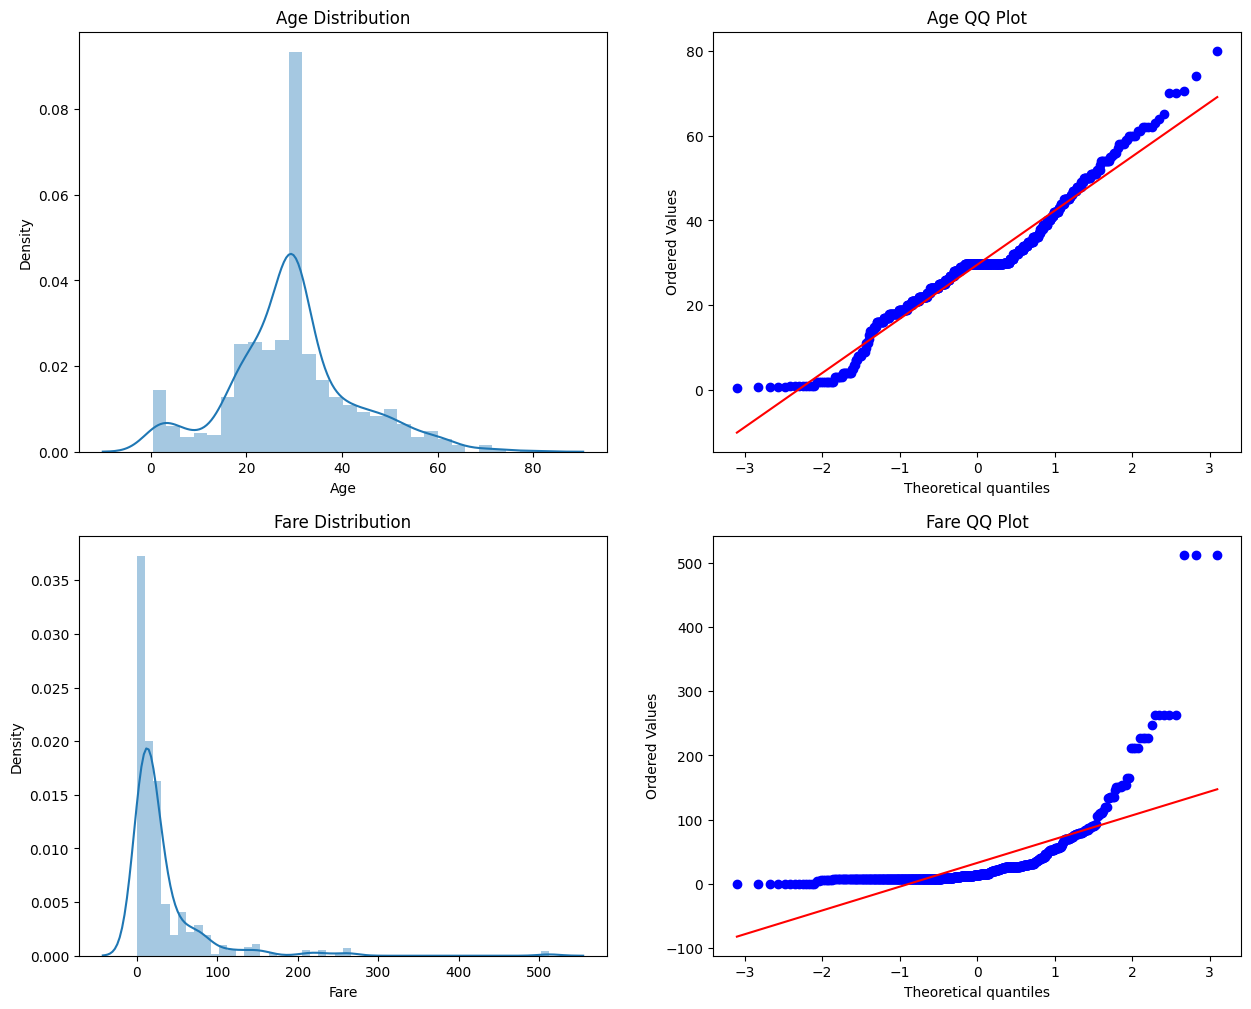

In [108]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.distplot(X_train['Age'])
plt.title('Age Distribution')

plt.subplot(222)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.subplot(223)
sns.distplot(X_train['Fare'])
plt.title('Fare Distribution')

plt.subplot(224)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

In [109]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [110]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.659217877094972


# Function Transformer - Log


In [111]:
trf = FunctionTransformer(func=np.log1p)

# np.log applies only log
# np.log1p add 1 to each value before applying to data
# it is necessary if you have 0s in your data

In [112]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

<ipython-input-113-b54d4b44e09c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Age'])
<ipython-input-113-b54d4b44e09c>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

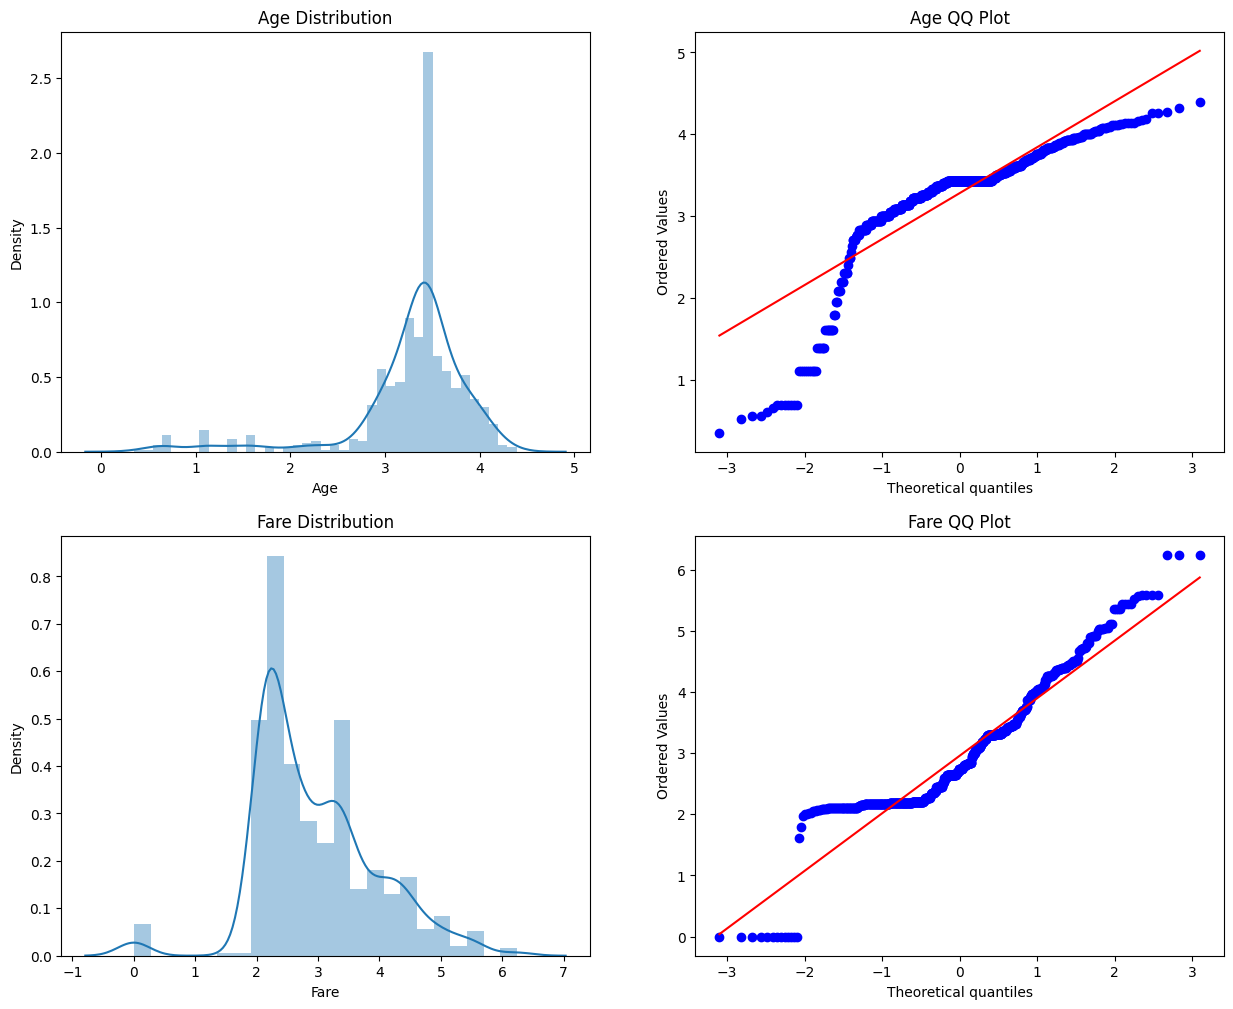

In [113]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.distplot(X_train_transformed['Age'])
plt.title('Age Distribution')

plt.subplot(222)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.subplot(223)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare Distribution')

plt.subplot(224)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

In [114]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

clf3.fit(X_train_transformed, y_train)
clf4.fit(X_train_transformed, y_train)

y_pred3 = clf3.predict(X_test_transformed)
y_pred4 = clf4.predict(X_test_transformed)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred3))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred4))

Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6871508379888268


In [115]:
trf2 = ColumnTransformer(transformers=[
    ('log', FunctionTransformer(func=np.log1p), ['Fare'])
], remainder='passthrough')

In [116]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [117]:
clf5 = LogisticRegression()
clf6 = DecisionTreeClassifier()

clf5.fit(X_train_transformed2,y_train)
clf6.fit(X_train_transformed2,y_train)

y_pred5 = clf5.predict(X_test_transformed2)
y_pred6 = clf6.predict(X_test_transformed2)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred5))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred6))

Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Accuracy: 0.6703910614525139


# Function Transformer - Reciprocal, Square Root